Assignment #1 Bankrupcy 
Venkata Sesha Eleswarapu (#4354235)

In [76]:
# downloading required packages
# pip install missingno
# !pip install -U imbalanced-learn



Neccessary libraries and packages:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as ms
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score


Importing data

In [78]:
#importing data
df = pd.read_excel("S:\\sem 3\\financial analytics\\Bankruptcy_data(1).xlsx")
df.head()


,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


Exploratory Data Analysis(EDA):

In [79]:
#Checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [80]:
#descriptive statstics of the dataset 
df.describe() 

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [81]:
#Checking the null values of each column
df.isnull().sum()
# drop Operational Margin, Assets Growth, Sales Growth, Employee Growth has majority of data is missing.

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [82]:
#Total null values 
df.isnull().sum().sum()

27053

<AxesSubplot:>

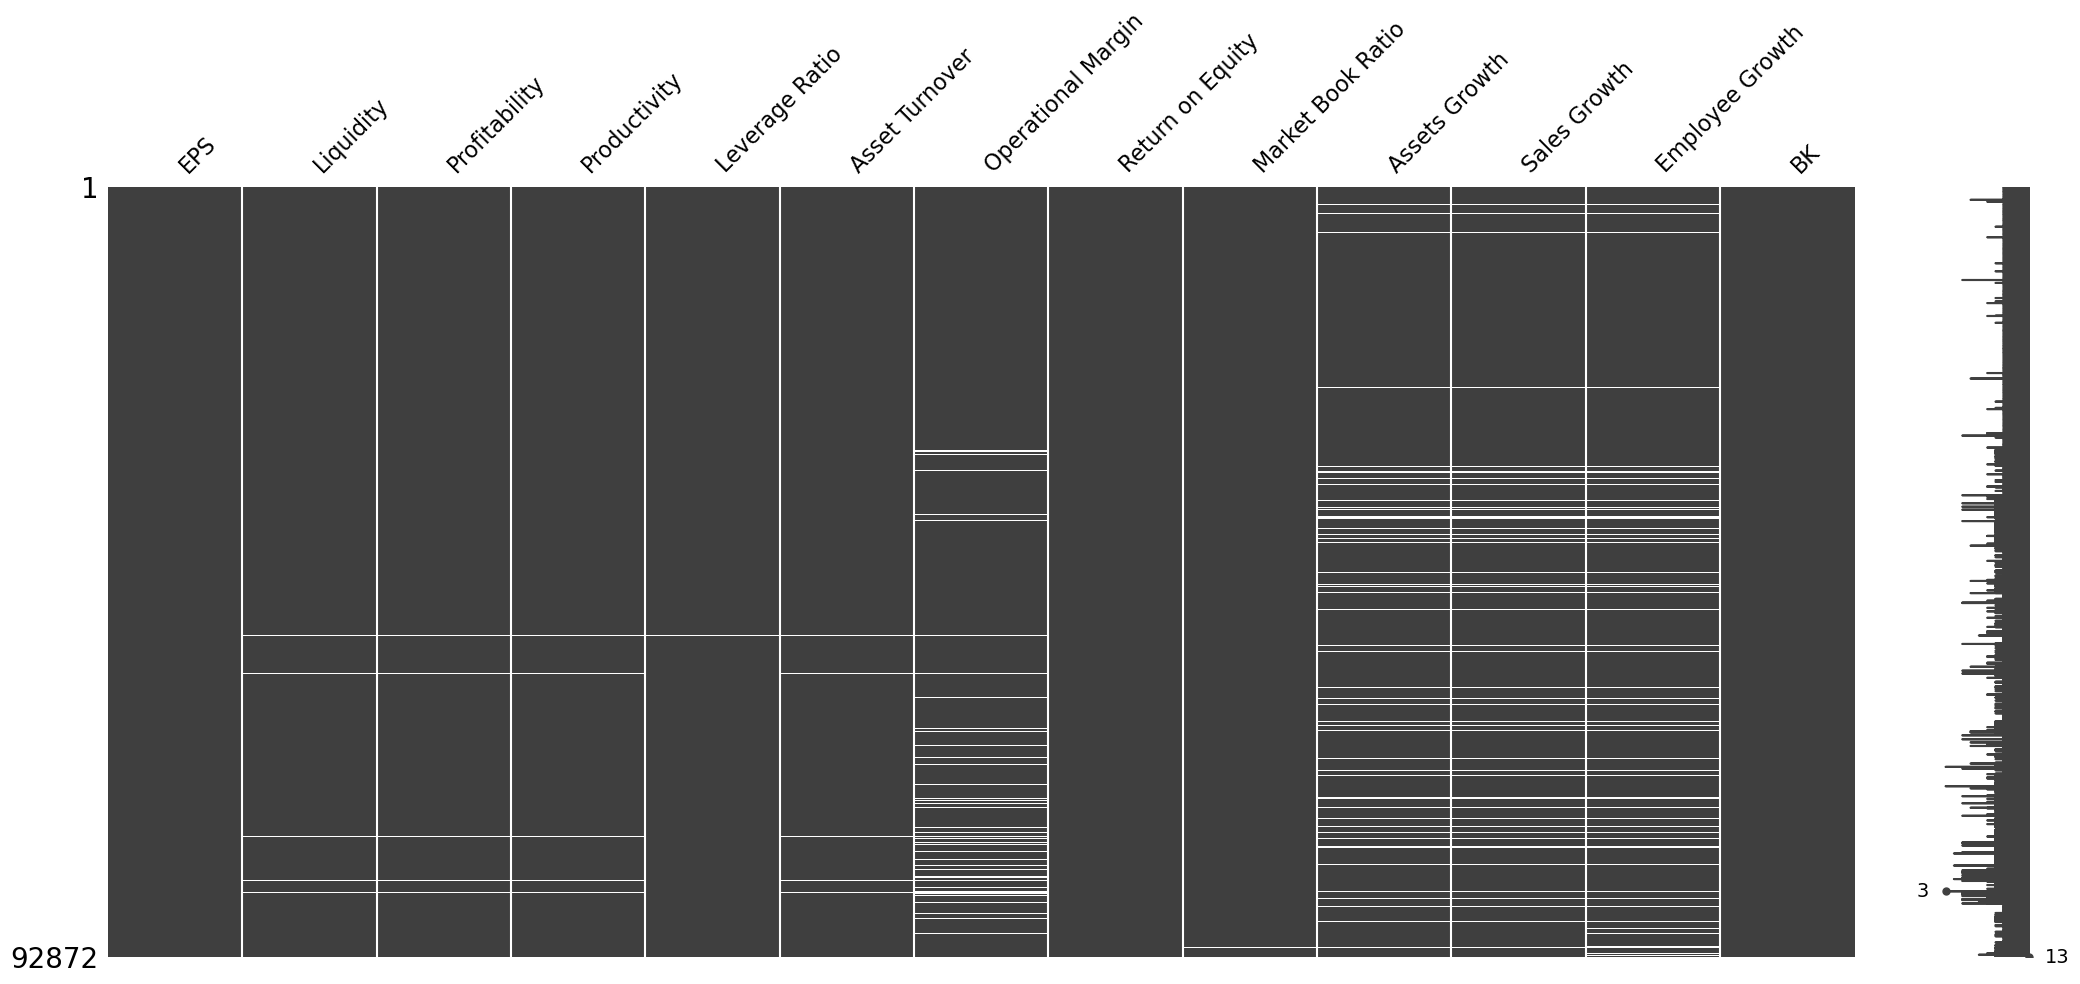

In [83]:
#visulazing missing data 
ms.matrix(df) 


In [84]:
#correlation matix 
corr_matrix = df.corr()
corr_matrix

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
EPS,1.000000,-0.000129,-0.000282,-0.000212,0.000025,0.000971,-0.000226,0.248225,0.000107,0.000079,0.000073,0.000179,-0.007229
Liquidity,-0.000129,1.000000,0.470622,0.226976,0.000147,-0.035377,0.004070,0.582335,0.001464,0.000499,0.000256,0.000829,0.001193
Profitability,-0.000282,0.470622,1.000000,0.434535,0.000280,-0.039318,0.019111,0.106389,-0.003982,0.000877,0.000469,0.001376,0.002454
Productivity,-0.000212,0.226976,0.434535,1.000000,0.000225,-0.021524,0.085273,0.001009,0.006186,0.000495,0.000300,0.001074,0.001346
Leverage Ratio,0.000025,0.000147,0.000280,0.000225,1.000000,-0.001203,0.000293,-0.000012,0.030031,-0.000093,0.000098,-0.000062,-0.000148
Asset Turnover,0.000971,-0.035377,-0.039318,-0.021524,-0.001203,1.000000,0.018420,-0.005039,-0.006375,-0.004082,-0.000050,-0.003182,0.015191
Operational Margin,-0.000226,0.004070,0.019111,0.085273,0.000293,0.018420,1.000000,0.002026,0.007173,-0.001166,0.000397,0.000092,0.001756
Return on Equity,0.248225,0.582335,0.106389,0.001009,-0.000012,-0.005039,0.002026,1.000000,0.000082,0.000111,0.000061,0.000155,-0.006530
Market Book Ratio,0.000107,0.001464,-0.003982,0.006186,0.030031,-0.006375,0.007173,0.000082,1.000000,-0.000682,-0.000928,0.000175,-0.000882
Assets Growth,0.000079,0.000499,0.000877,0.000495,-0.000093,-0.004082,-0.001166,0.000111,-0.000682,1.000000,0.073809,0.012894,-0.001393


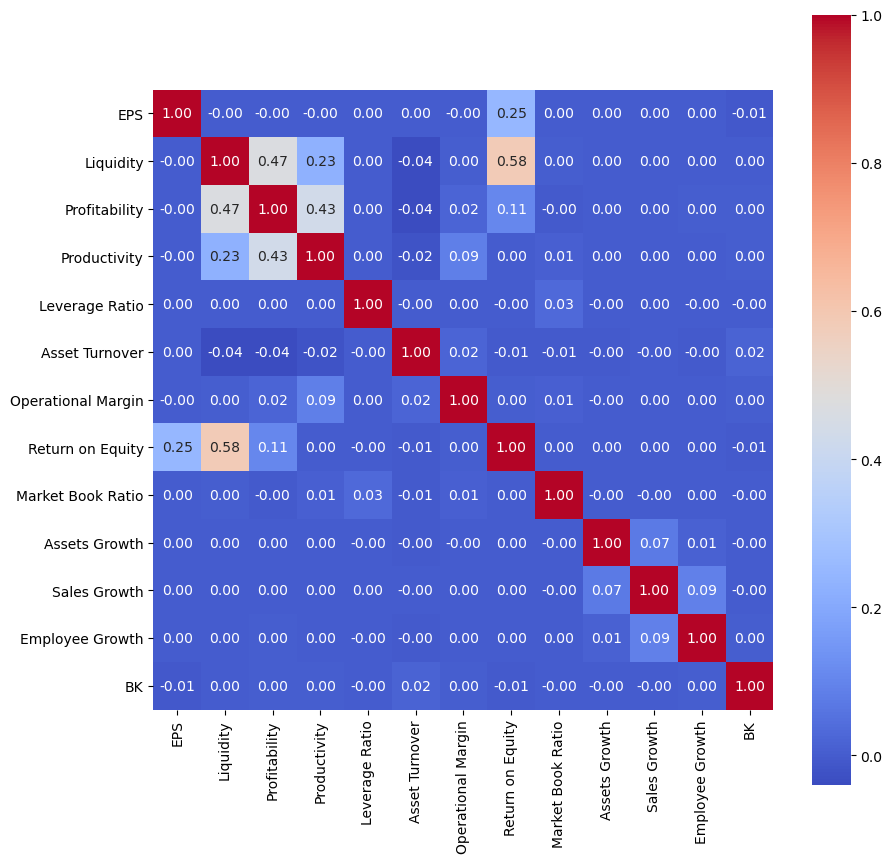

In [85]:
# graph for correlation 
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


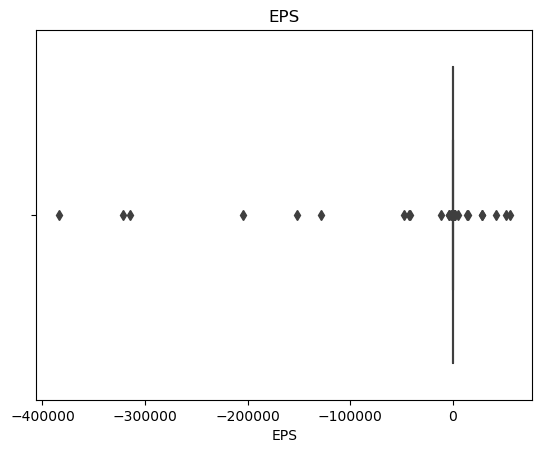

AxesSubplot(0.125,0.11;0.775x0.77)


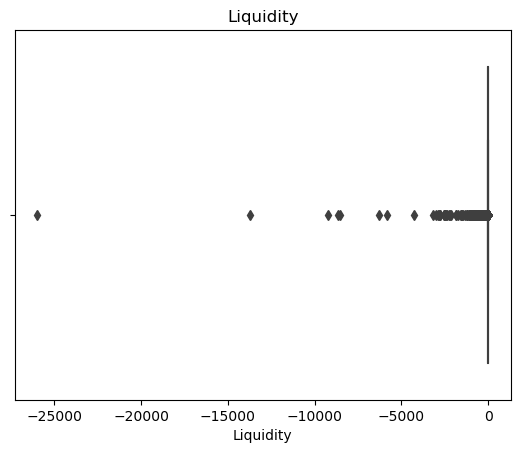

AxesSubplot(0.125,0.11;0.775x0.77)


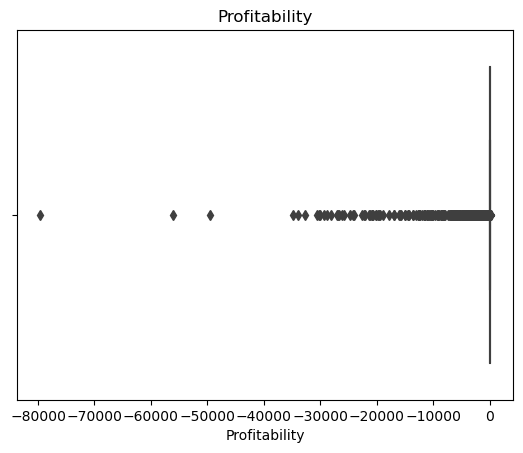

AxesSubplot(0.125,0.11;0.775x0.77)


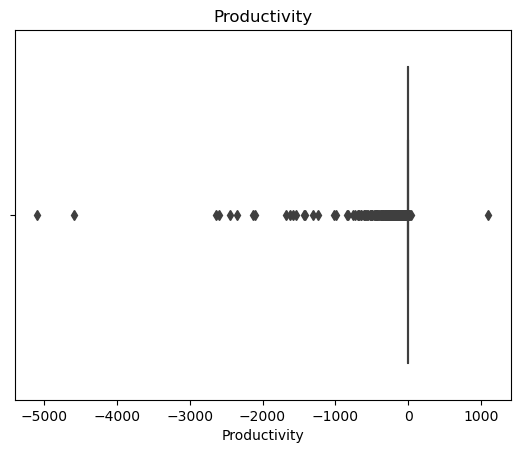

AxesSubplot(0.125,0.11;0.775x0.77)


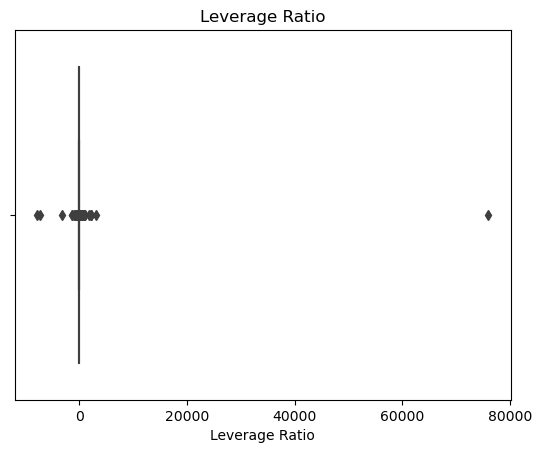

AxesSubplot(0.125,0.11;0.775x0.77)


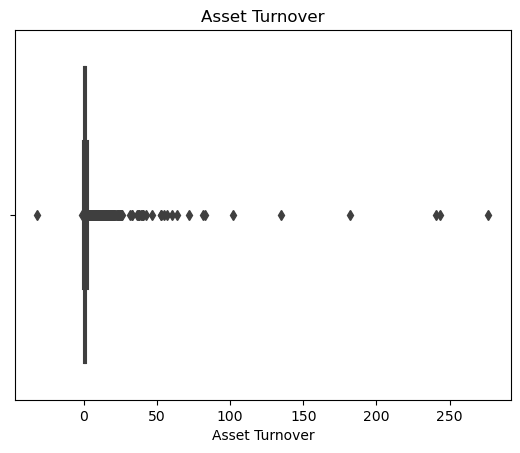

AxesSubplot(0.125,0.11;0.775x0.77)


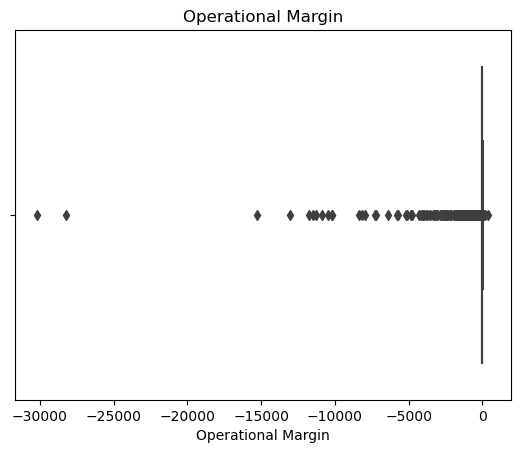

AxesSubplot(0.125,0.11;0.775x0.77)


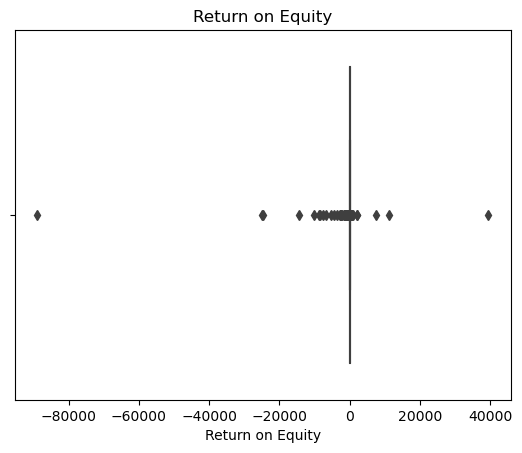

AxesSubplot(0.125,0.11;0.775x0.77)


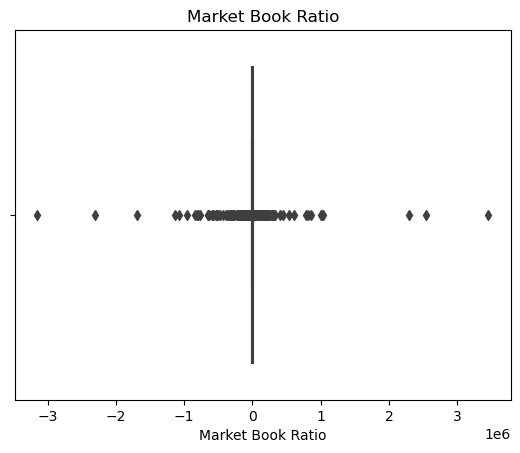

AxesSubplot(0.125,0.11;0.775x0.77)


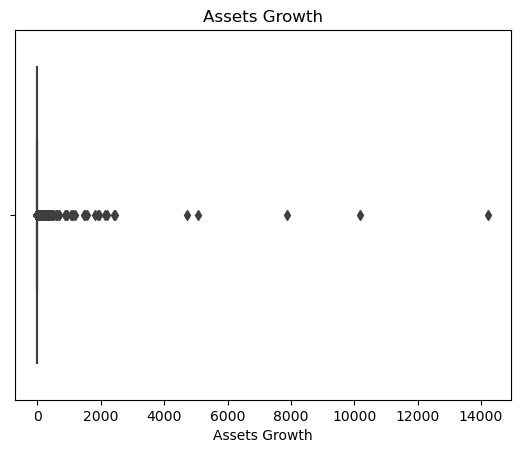

AxesSubplot(0.125,0.11;0.775x0.77)


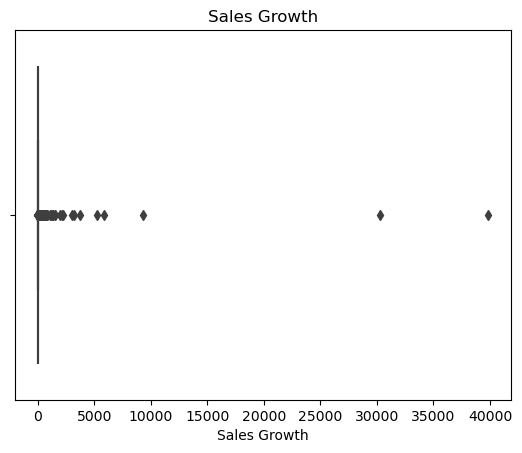

AxesSubplot(0.125,0.11;0.775x0.77)


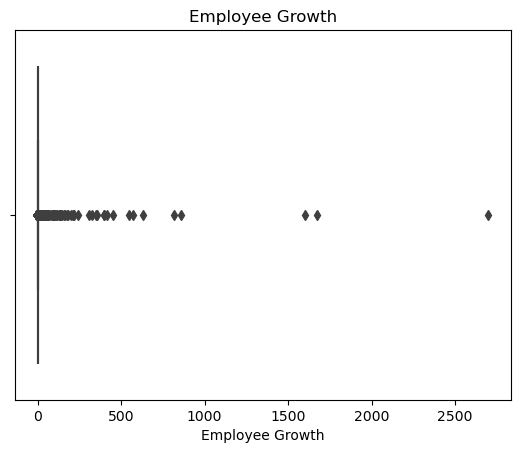

In [86]:
#Checking for outliers
Yhat= df["BK"]
predictors= df[["EPS","Liquidity","Profitability","Productivity","Leverage Ratio",
                "Asset Turnover","Operational Margin"	,
                "Return on Equity"	,"Market Book Ratio","Assets Growth",
                "Sales Growth","Employee Growth"]]
for predictor in predictors:
    print(sns.boxplot(x=predictors[predictor]))
    plt.title(predictor) # for column name as title
    plt.show()

In [87]:
#Checking the null values of each column.
df.isnull().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

My Observations from the EDA:
The dataset contains 13 columns with 12 predictors/ factors and one output variable. The output variable(BK) is a classifier, where 0 is not bankrupt and 1 is bankrupt, rest all the columns are numerical values.

Issues to deal while dataprocessing: 

I have used discribe function to find out the summary statistics of each column seperatly, the output suggested that there are multiple outliers based on the min and max values when compared quartiles.

Checked for any null values in the dataset to either remove them or impute them for model creation.There are total of 27053 null values. 

Checked the correlation of each column through correlation matrix, to understand the relation across the columns and with the output. Also to check whether there are any columns with high correlation score as that would impact the model performace. And use heat map to visualize the data.



Data Processing: 
The choice to impute part data is to prevent as much as data leakage and to train an accurate model. Imputing columns with less than 1% of the total data will not inflate the model scores, but imputing all the 27053 cell (29% of total data) will have more artificially generated information that might not perform well in the real world data(or any future data).

Imputing through linear regression instead of measure of central tendency or KNN is for better performance.

Outliers were observed but were not removed on an assumption that the quantum of outliers suggest the possiblity of the nature of such outliers in the data set.And also the occurence of such outlier in future data.

Data Processing

In [88]:
#one way of imputing missing values
#Replacing missing values through median for EPS,Leverage Ratio, Market Book Ratio, Return on Equity

#imputing_median = ["EPS","Leverage Ratio", "Market Book Ratio", "Return on Equity"]
#for i in imputing_median:
  #  df[i] = df[i].fillna(df[i].median())

In [89]:
#Imputing linear regression to impute values.
imputer = IterativeImputer(estimator= LinearRegression())
df[['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Asset Turnover', 'Return on Equity','Leverage Ratio','Market Book Ratio']] = imputer.fit_transform(df[['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Asset Turnover', 'Return on Equity','Leverage Ratio','Market Book Ratio']])


In [90]:
#checking for null values after imputing several columns
df.isnull().sum()

EPS                      0
Liquidity                0
Profitability            0
Productivity             0
Leverage Ratio           0
Asset Turnover           0
Operational Margin    5557
Return on Equity         0
Market Book Ratio        0
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [91]:
#Droping the rows instead of imuputing, because generating more artificial values 
# can inflate the models performance. 
df = df.dropna()


In [92]:
#checking the balance of output. 
Yhat.value_counts() 

0    92314
1      558
Name: BK, dtype: int64

In [93]:
# Train test split
X = df[["EPS", "Liquidity", "Profitability", "Productivity", "Leverage Ratio", "Asset Turnover", "Operational Margin", "Return on Equity", "Market Book Ratio", "Assets Growth", "Sales Growth", "Employee Growth"]]
y = df["BK"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SMOTEEN is combination of SMOTE and editing nearest neighbours(Like KNN),The samples generated by SMOTE will balance the classes(0 and 1) and ENN will make the data more meaningful.

In [94]:

# Creating a SMOTEENN 
smenn = SMOTEENN(random_state=42)

# Resample the training data
X_res, y_res = smenn.fit_resample(X, y)


Using Robustscaler, as outliers were not handled during data pre-processing, as it will reduce the impact of outliers. The models selected that are Randomforest and decision tree are also less senstitive to the outliers.
Assumption: The data is in such way that outliers are need for better understanding of the predictors and in the realworld the data can contain outliers which cannot be removed or tranforimg is not accurate.

In [95]:
# Scaling data.
# Create a RobustScaler instance
sc = RobustScaler()

# Fit the RobustScaler instance and scale the resampled training data
X_res_scaled = sc.fit_transform(X_res)

# Scale the test data
X_test_scaled = sc.transform(X_test)


Random Forest Classifier:


In [96]:
# Train a RandomForestClassifier with class_weight="balanced"
rf = RandomForestClassifier(criterion="entropy",class_weight="balanced", random_state=42)
rf.fit(X_res_scaled, y_res)

# Make predictions on the test set
rf_predictions = rf.predict(X_test_scaled)

# Classification report and confusion matrix 
print("Random forest")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random forest
[[15960   197]
 [    0    92]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16157
           1       0.32      1.00      0.48        92

    accuracy                           0.99     16249
   macro avg       0.66      0.99      0.74     16249
weighted avg       1.00      0.99      0.99     16249



The model has high precision, recall and f1-score for the 0 BK class. Perfect recall of 1 and decent precision and F1 -score for 1 BK class.

In [97]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest variable 
rf = RandomForestClassifier()
# Perform cross-validation
cv_scores = cross_val_score(rf, X_res_scaled, y_res, cv=5, scoring='recall')

# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean recall:", cv_scores.mean())

Cross-validation scores: [0.99962083 0.99949444 0.99930485 0.99936805 0.99981041]
Mean recall: 0.9995197168857433


Checking for overfitting through cross validating recall(as it is nearly perfect) but suggest no significant overfitting as it has provided high values for 5 different samples.


Possible overfitting, when used SMOTE for resampling dataset. The SMOTE might have created multiple easy situations to increase the scores of the model.Hence the use of SMOTEENN

[[16157     0]

 [    0    92]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16157
           1       1.00      1.00      1.00        92

    accuracy                           1.00     16249
   macro avg       1.00      1.00      1.00     16249
weighted avg       1.00      1.00      1.00     16249

Decision Tree:

In [98]:
# Creating a Decision Tree model
dt_model = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5,
                                  min_samples_split=10,class_weight="balanced", random_state=42)

# Fitting the model on the resampled data
dt_model.fit(X_res_scaled, y_res)

# Predictions on the test set
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree
[[15795   362]
 [    2    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16157
           1       0.20      0.98      0.33        92

    accuracy                           0.98     16249
   macro avg       0.60      0.98      0.66     16249
weighted avg       1.00      0.98      0.98     16249



The model has high precision, recall and f1-score for the 0 BK class. Perfect recall of 1 and decent precision and F1 -score for 1 BK class.

Checking for overfitting due to high recall in class 1 BK.

In [99]:
# Create a decision tree model variable 
dt = DecisionTreeClassifier()
# Perform cross-validation
cv_scores = cross_val_score(dt, X_res_scaled, y_res, cv=5, scoring='recall')

# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean recall:", cv_scores.mean())

Cross-validation scores: [0.98805612 0.9895728  0.98944641 0.98976239 0.99184783]
Mean recall: 0.9897371081900911


Logistic  Regression

In [100]:
# Creating a Logistic Regression model 
lr_model = LogisticRegression(class_weight="balanced", random_state=42)

# Fitting the model on the resampled data
lr_model.fit(X_res_scaled, y_res)

# Predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluating the model

print("Logistic Regression")
print(confusion_matrix(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression
[[12033  4124]
 [   32    60]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     16157
           1       0.01      0.65      0.03        92

    accuracy                           0.74     16249
   macro avg       0.51      0.70      0.44     16249
weighted avg       0.99      0.74      0.85     16249



c:\Users\91628\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



The model shows poor performance in detecting positive instances, with low precision, recall, and F1-score for the class 1 BK.

In [101]:
#from sklearn import svm
# Creating a SVM model 
#svm_model = svm.SVC(class_weight="balanced", random_state=42)

# Fitting the model on the resampled data
#svm_model.fit(X_res_scaled, y_res)

#Predictions on the test set
#svm_predictions = svm_model.predict(X_test_scaled)

# Evaluating the model
#print("Support Vector Machine (SVM)")
#print("Classification Report:")
#print(classification_report(y_test, svm_predictions))

K- Nearest Neighbors

In [102]:

# Creating a KNeighborsClassifier
knn = KNeighborsClassifier()

# Fitting the classifier to the resampled and scaled training data
knn.fit(X_res_scaled, y_res)

# Predicting the labels of the test set
knn_predictions = knn.predict(X_test_scaled)

# Print the classification report
print("K-Nearest Neighbors Classifier")
print(confusion_matrix(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

c:\Users\91628\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Classifier
[[15052  1105]
 [    0    92]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16157
           1       0.08      1.00      0.14        92

    accuracy                           0.93     16249
   macro avg       0.54      0.97      0.55     16249
weighted avg       0.99      0.93      0.96     16249



The model exhibits high recall and F1-score for the class 1 BK, suggesting it performs well in identifying class 1 Bk. However, the low precision for the class 1 Bk and the possibility of overfitting.

Model evaluation:
Creating ROC-AUC curve, for evaluating which model to choose.

Randomforest : 0.9939035712075261
decision tree: 0.9779278600471998
logistic : 0.6984642542874134
KNN : 0.9658042953518599


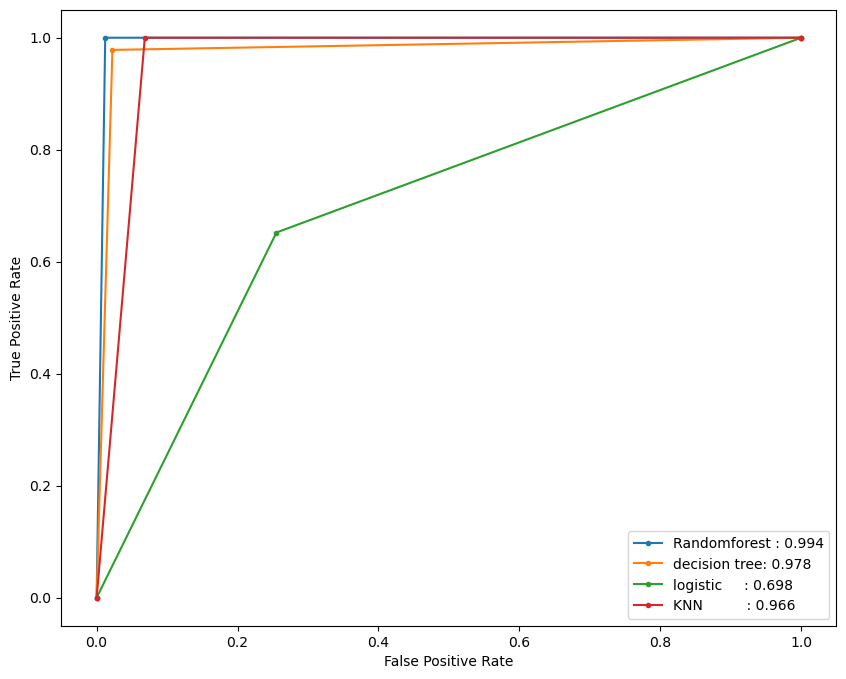

In [106]:
# calculate scores
auc1 = roc_auc_score(y_test, rf_predictions)
auc2 = roc_auc_score(y_test, dt_predictions)
auc3 = roc_auc_score(y_test, lr_predictions)
auc4 = roc_auc_score(y_test, knn_predictions)

print('Randomforest :', auc1)
print('decision tree:', auc2)
print('logistic :', auc3)
print('KNN :', auc4)
# calculate roc curves
fpr1, tpr1, _ = roc_curve(y_test, rf_predictions)
fpr2, tpr2, _ = roc_curve(y_test, dt_predictions)
fpr3, tpr3, _ = roc_curve(y_test, lr_predictions)
fpr4, tpr4, _ = roc_curve(y_test, knn_predictions)

# plot the roc curve for the model
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, marker='.', label='Randomforest : %.3f' % auc1)
plt.plot(fpr2, tpr2, marker='.', label='decision tree: %.3f' % auc2)
plt.plot(fpr3, tpr3, marker='.', label='logistic     : %.3f' % auc3)
plt.plot(fpr4, tpr4, marker='.', label='KNN          : %.3f' % auc4)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Conclusion:
Except of KNN rest of the models have relatability high values. Choosing better models should be a combination AUC scores, F1 scores, recall and precision. BAsed on that Randomforest and decision tree models are better in terms of scores.

Future steps: The models can be tuned better by using grid search and have better performing model. Experimenting models through boosting or bagging ensembles methods to enchance the predictive power. If possible collect more data for the class 1 BK to balance the data and better performance of the data.